In [33]:
import numpy as np
import scipy as scp
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as  plt


In [2]:
def taking_ith_order(A,n):
    A.sort()
    ln = len(A)
    if n >= ln:
        return A
    k = int(ln/n)
    return [A[k*ii] for ii in range(n)]

In [58]:
def blom(i,n):
    return norm.ppf((i - (3/8.))/(n+(1./4.)))
def generate_nth_order(n):
    A = np.array([blom(ii,n) for ii in range(1,n+1)])
    A= A/(A.std())
    return list(A)
def ShapiroFranciaCorrelation(data,sz = None):
    if not sz:
        sz = len(data)
    else:
        data = taking_ith_order(data,n)
    blm1 = generate_nth_order(sz)
    data.sort()
    #print("data mean %0.3f"%np.array(data).mean())
    #print("blm1 mean %0.3f"%np.array(blm1).mean())
    #print("data dot blm1 %0.3f"%np.dot(data,blm1).mean())
    #print("data corr blm1 %0.3f"%np.corrcoef(data,blm1)[0,1])
    return np.corrcoef(data,blm1)[0,1]
def ShapiroFranciaDecomposition(data,sz = None):
    data_std = np.array(data).std()
    #print("data std is %0.4f"%data_std)
    data = list(np.array(data)*(1./data_std))
    data_c = list(enumerate(data))
    data_c.sort(key = lambda x: x[1])
    
    crl = ShapiroFranciaCorrelation(data,sz)
    blm =  generate_nth_order(len(data))
    #crl2 = np.dot(data,blm)/len(data)
    #print("crl : %0.4f, crl2 : %0.4f"%(crl,crl2))
    #crl = crl2
    #print("blm norm %0.3f"%(sum(np.array(blm)**2)/len(blm)))
    #print("data norm %0.3f"%(sum(np.array(data)**2)/len(data)))
    #print("correlation %0.3f"%crl)
    res = [(data_c[ii][0],data_c[ii][1] - crl*blm[ii] ) for ii in range(len(data))]
    normal_part = [(data_c[ii][0],crl*blm[ii] ) for ii in range(len(data))]
    res_f = [0 for ii in  range(len(data))]
    normal_f = [0 for ii in  range(len(data))]
    for x in normal_part:
        normal_f[x[0]] = x[1]
    for x in res:
        res_f[x[0]] = x[1]
    
    print("means:",np.array(normal_f).mean(),np.array(res_f).mean())
    print("norms:",sum(np.array(normal_f)**2)/len(normal_f),sum(np.array(res_f)**2)/len(res_f))
    print("dot prod: %0.3f"%np.dot(np.array(normal_f),np.array(res_f)))
    print("test sum %0.4f"%sum(np.array(normal_f)*data_std + np.array(res_f)*data_std - np.array(sorted(data))))
    return np.array(normal_f)*data_std,np.array(res_f)*data_std
    
    

In [59]:
def correlation_breakdown(x,y):
    
    x = np.array(x)
    y = np.array(y)
    x_n = (x-np.mean(x))/np.std(x)
    y_n = (y-np.mean(y))/np.std(y)
    print(sum(x_n**2)/x_n.shape[0])
    print(sum(y_n**2)/y_n.shape[0])
    corr_coef = np.corrcoef(x_n,y_n)[0,1]
    
    corr_error = x_n - corr_coef*y_n
    print("correlation error decomposition %0.4f" %(sum(corr_error**2)/corr_error.shape[0] + corr_coef**2))
    n = 100000
    
    
    
    normal_f,non_normal_f =  ShapiroFranciaDecomposition(corr_error)
    return corr_coef,normal_f,non_normal_f
def correlation_analysis(x,y):
    corr_coef,normal_f,non_normal_f = correlation_breakdown(x,y)
    print(corr_coef)
    print(sum(normal_f**2)/normal_f.shape[0])
    print(sum(non_normal_f**2)/non_normal_f.shape[0])
    print(sum(normal_f),sum(non_normal_f))
    print(sum(normal_f**2)/normal_f.shape[0]+corr_coef**2+sum(non_normal_f**2)/non_normal_f.shape[0] )
    
    



In [60]:
spy_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/index_data/SPY.csv")
xom_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/PriceVolume/XOM.csv")
amzn_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/PriceVolume/AMZN.csv")
msft_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/PriceVolume/MSFT.csv")

In [61]:
k =4000
spy_returns  = spy_pv["Adjusted_close"].pct_change()[-k:]
xom_returns  = xom_pv["Adjusted_close"].pct_change()[-k:]
amzn_returns  = amzn_pv["Adjusted_close"].pct_change()[-k:]

In [62]:
weight_height = pd.read_csv("data/weight-height.csv")
weight_height.shape, weight_height.columns

((10000, 3), Index(['Gender', 'Height', 'Weight'], dtype='object'))

In [63]:
male_weight_height = weight_height[weight_height["Gender"] == "Male"]
male_weight_height.shape

(5000, 3)

In [64]:
male_weight_height = male_weight_height.dropna()
correlation_analysis(male_weight_height["Height"],male_weight_height["Weight"])

1.0000000000000016
0.9999999999999969
correlation error decomposition 1.0000
means: 3.552713678800501e-18 1.961830697894129e-15
norms: 0.9995072649498307 0.000492735050168074
dot prod: -0.000
test sum -0.0000
0.8629788486163174
0.2551417275930642
0.00012577924778950838
-2.2849777625566503e-14 4.957210857081673e-12
0.9999999999999986


1.0000000000000007
0.9999999999999981
correlation error decomposition 1.0000


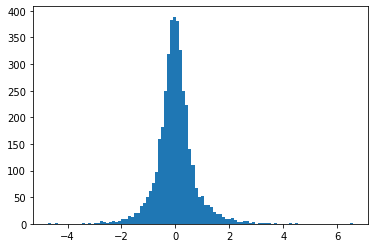

data std is 0.7160
data mean -0.000
blm1 mean 0.000
data dot blm1 3846.463
data corr blm1 0.962
crl : 0.9616, crl2 : 0.9616
blm norm 1.000
data norm 1.000
correlation 0.962
means: 2.6645352591003758e-18 -4.085620730620576e-17
norms: 0.9247046123938304 0.0752953876061707
dot prod: -0.000
-1.6626700016786344e-12
0.698122150093873
0.474027130573645
0.03859833297466267
1.6028844918025698e-14 -1.30518859609019e-13
0.9999999999999998


In [49]:
correlation_analysis(xom_returns,spy_returns)

In [ ]:
#<x,y> = c
#<(x-c*y),y> = <x,y> - c <y,y>


In [95]:
mm =10000
def generate_nth_order2(n):
    A = np.array([blom(ii,n) for ii in range(1,n+1)])
    A= A/(A.std())
    return list(A)
sum(np.array(generate_nth_order2(mm))**2)/mm

1.0000000000000016

In [4]:
import numpy as np
a = np.array([1,2,3])
(a**2).sum()

14

In [4]:
L = [3,7,5]
L2 = list(enumerate(L))
L2.sort(key = lambda x: x[1])
L2

[(0, 3), (2, 5), (1, 7)]

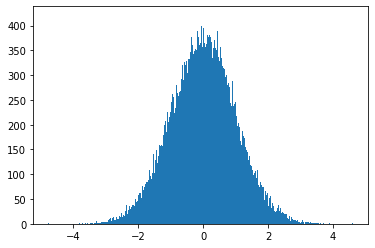

In [3]:
import matplotlib.pyplot as  plt
n = 100000
N = [np.random.normal() for ii in range(n)]
A=plt.hist(N, bins = int (n/100))
plt.show()

In [6]:
#random.Generator.standard_cauchy(size=None)
#n = 100000
Chy = np.random.default_rng().standard_cauchy(n)
#Chy = Chy[(Chy>-25) & (Chy<25)] 
#A2=plt.hist(Chy, bins = int (n/100))
#plt.show()

In [15]:
Chy.shape

(100000,)

In [32]:
from scipy.stats import levy_l
levy_samp = levy_l.rvs(size=100000)

In [39]:
levy_samp = levy_samp - levy_samp.mean()

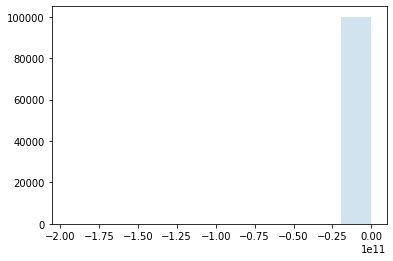

In [40]:
L=plt.hist(levy_samp,histtype='stepfilled', alpha=0.2)
plt.show()

In [38]:
levy_samp.mean()

-2137288.272897682

In [7]:
N.sort()

In [8]:
def taking_ith_order(A,n):
    A.sort()
    ln = len(A)
    if n >= ln:
        return A
    k = int(ln/n)
    return [A[k*ii] for ii in range(n)]
        

In [9]:
sum(taking_ith_order(N,10))

-4.793640686706343

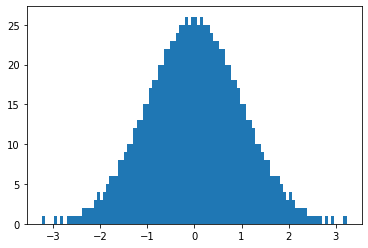

In [10]:
Blom = plt.hist(generate_nth_order(1000),bins= 100)
plt.show()

In [16]:
blm1 = generate_nth_order(4000)

In [17]:
n_samp = taking_ith_order(N,4000)

In [18]:
len(blm1),len(n_samp)

(4000, 4000)

In [19]:
np.corrcoef(blm1,n_samp)

array([[1.        , 0.99982637],
       [0.99982637, 1.        ]])

In [20]:
import pandas as pd
spy_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/index_data/SPY.csv")
xom_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/PriceVolume/XOM.csv")
amzn_pv = pd.read_csv("/Users/itaybendan/DirectIndexingBondIt/data/PriceVolume/AMZN.csv")

In [21]:
spy_pv.head()
spy_returns  = spy_pv["Adjusted_close"].pct_change()[-4000:]
xom_returns  = xom_pv["Adjusted_close"].pct_change()[-4000:]
amzn_returns  = amzn_pv["Adjusted_close"].pct_change()[-4000:]

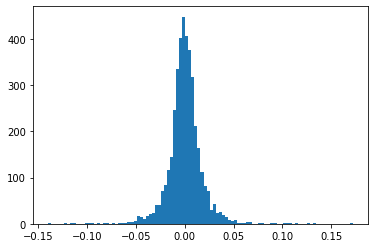

In [22]:
A1 = plt.hist(xom_returns, bins = 100)
plt.show()

In [23]:
spy_returns_l = list(spy_returns)
spy_returns_l.sort()
xom_returns_l = list(xom_returns)
xom_returns_l.sort()
amzn_returns_l = list(amzn_returns)
amzn_returns_l.sort()

In [24]:
np.corrcoef(blm1,spy_returns_l)

array([[1.        , 0.93199749],
       [0.93199749, 1.        ]])

In [25]:
np.corrcoef(blm1,xom_returns_l)

array([[1.        , 0.94712002],
       [0.94712002, 1.        ]])

In [26]:
np.corrcoef(blm1,amzn_returns_l)

array([[1.        , 0.94046258],
       [0.94046258, 1.        ]])

In [29]:
Chy_l = list(Chy)
Chy_l.sort()

In [30]:
n_samp_chy = taking_ith_order(Chy_l,4000)

In [31]:
np.corrcoef(blm1,n_samp_chy)

array([[1.        , 0.12086406],
       [0.12086406, 1.        ]])

In [41]:
levy_samp_l = list(levy_samp)
levy_samp_l.sort()
n_samp_levy = taking_ith_order(levy_samp_l,4000)

In [42]:
np.corrcoef(blm1,n_samp_levy)

array([[1.        , 0.05704176],
       [0.05704176, 1.        ]])

In [45]:
from scipy.stats import moment
moment(levy_samp_l, moment=6)

5.5733124137301015e+62

In [47]:
moment(Chy_l,moment = 6)

8.02542628588533e+37

In [51]:
moment(blm1,moment = 20)

104921874.82799192

In [52]:
from scipy.stats import kurtosis as scipy_kurtosis 
from sympy.stats import P, E, variance, std, Die, Normal, StudentT
from sympy import Eq, simplify

In [53]:
scipy_kurtosis(blm1)

-0.017610038525888605

In [54]:
scipy_kurtosis(Chy_l)

99993.8371000564

In [55]:
scipy_kurtosis(levy_samp_l)

98733.00508052106

In [60]:
np.std(blm1), np.std(Chy_l), np.std(levy_samp_l)
s_l = np.std(levy_samp_l)
s_c = np.std(Chy_l)

In [61]:
levy_samp_m = [x*1./s_l for x in levy_samp_l]
cauchy_samp_m = [x* 1./s_c for x in Chy_l]

In [63]:
np.std(levy_samp_m), np.std(cauchy_samp_m)

(0.9999999999999998, 0.9999999999999998)

In [66]:
moment(cauchy_samp_m,moment = 4), moment(levy_samp_m,moment = 4)

(99996.83710005635, 98736.005080521)

In [67]:
from sympy.stats import P, E, variance, std, Die, Normal, StudentT

In [93]:
len([x for x in cauchy_samp_m if abs(x) > 2])/float(len(cauchy_samp_m))

1e-05

In [92]:
len([x for x in levy_samp_m if abs(x) > 2])/float(len(levy_samp_m))

2e-05

In [86]:
np.std(cauchy_samp_m)

0.9999999999999998

In [97]:
ShapiroFranciaCorrelation(spy_returns_l)

0.9319974911328509